<a href="https://colab.research.google.com/github/DiegoOCruz/Artificial-Clusteriza-o/blob/main/TP3_Cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles, fetch_covtype, fetch_olivetti_faces
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import pandas as pd
import numpy as np


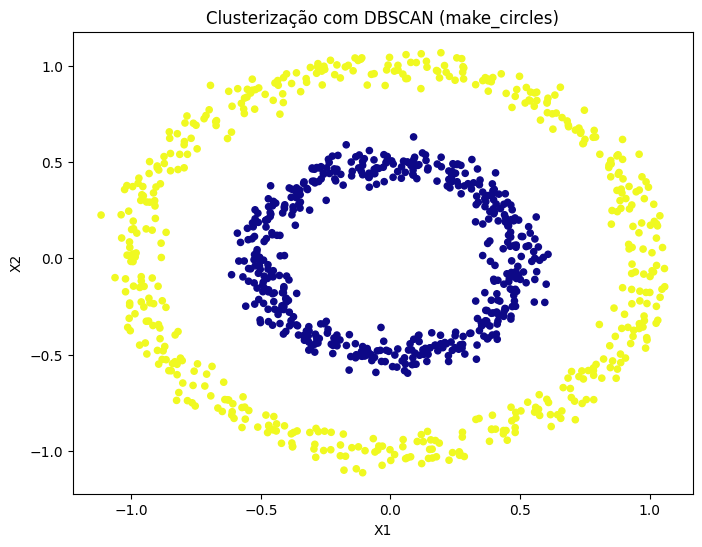

Número de clusters encontrados: 2
Rótulos dos clusters: [0 1]


In [ ]:
#Questão 1

# 1. Gerando o dataset sintético
X, y = make_circles(n_samples=1000, factor=0.5, noise=0.05, random_state=42)

# 2. Aplicando DBSCAN
dbscan = DBSCAN(eps=0.1, min_samples=5)  # eps controla o raio de vizinhança
labels = dbscan.fit_predict(X)

# 3. Visualizando resultado
plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=labels, cmap="plasma", s=20)
plt.title("Clusterização com DBSCAN (make_circles)")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

# 4. Informações dos clusters
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print(f"Número de clusters encontrados: {n_clusters}")
print("Rótulos dos clusters:", np.unique(labels))



=== Métricas DBSCAN ===
Silhouette Score: 0.11246179620938268
Davies-Bouldin Score: 894.1294250687164
Calinski-Harabasz Score: 0.0011217575696786193
Adjusted Rand Index (ARI): 1.0
Normalized Mutual Information (NMI): 1.0


Text(0.5, 1.0, 'Clusters verdadeiros')

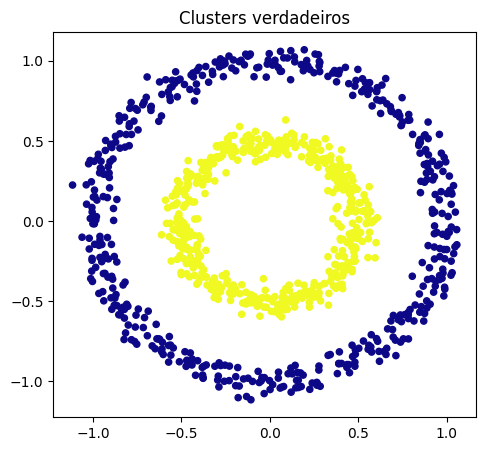

In [ ]:
#Questão 2
# 3. Métricas internas (sem rótulos verdadeiros)
if len(set(labels)) > 1 and -1 not in set(labels):
    sil = silhouette_score(X, labels)
    db = davies_bouldin_score(X, labels)
    ch = calinski_harabasz_score(X, labels)
else:
    sil, db, ch = None, None, None

# 4. Métricas externas (comparando com y)
ari = adjusted_rand_score(y, labels)
nmi = normalized_mutual_info_score(y, labels)

print("=== Métricas DBSCAN ===")
print(f"Silhouette Score: {sil}")
print(f"Davies-Bouldin Score: {db}")
print(f"Calinski-Harabasz Score: {ch}")
print(f"Adjusted Rand Index (ARI): {ari}")
print(f"Normalized Mutual Information (NMI): {nmi}")

# Dados verdadeiros
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(X[:,0], X[:,1], c=y, cmap="plasma", s=20)
plt.title("Clusters verdadeiros")

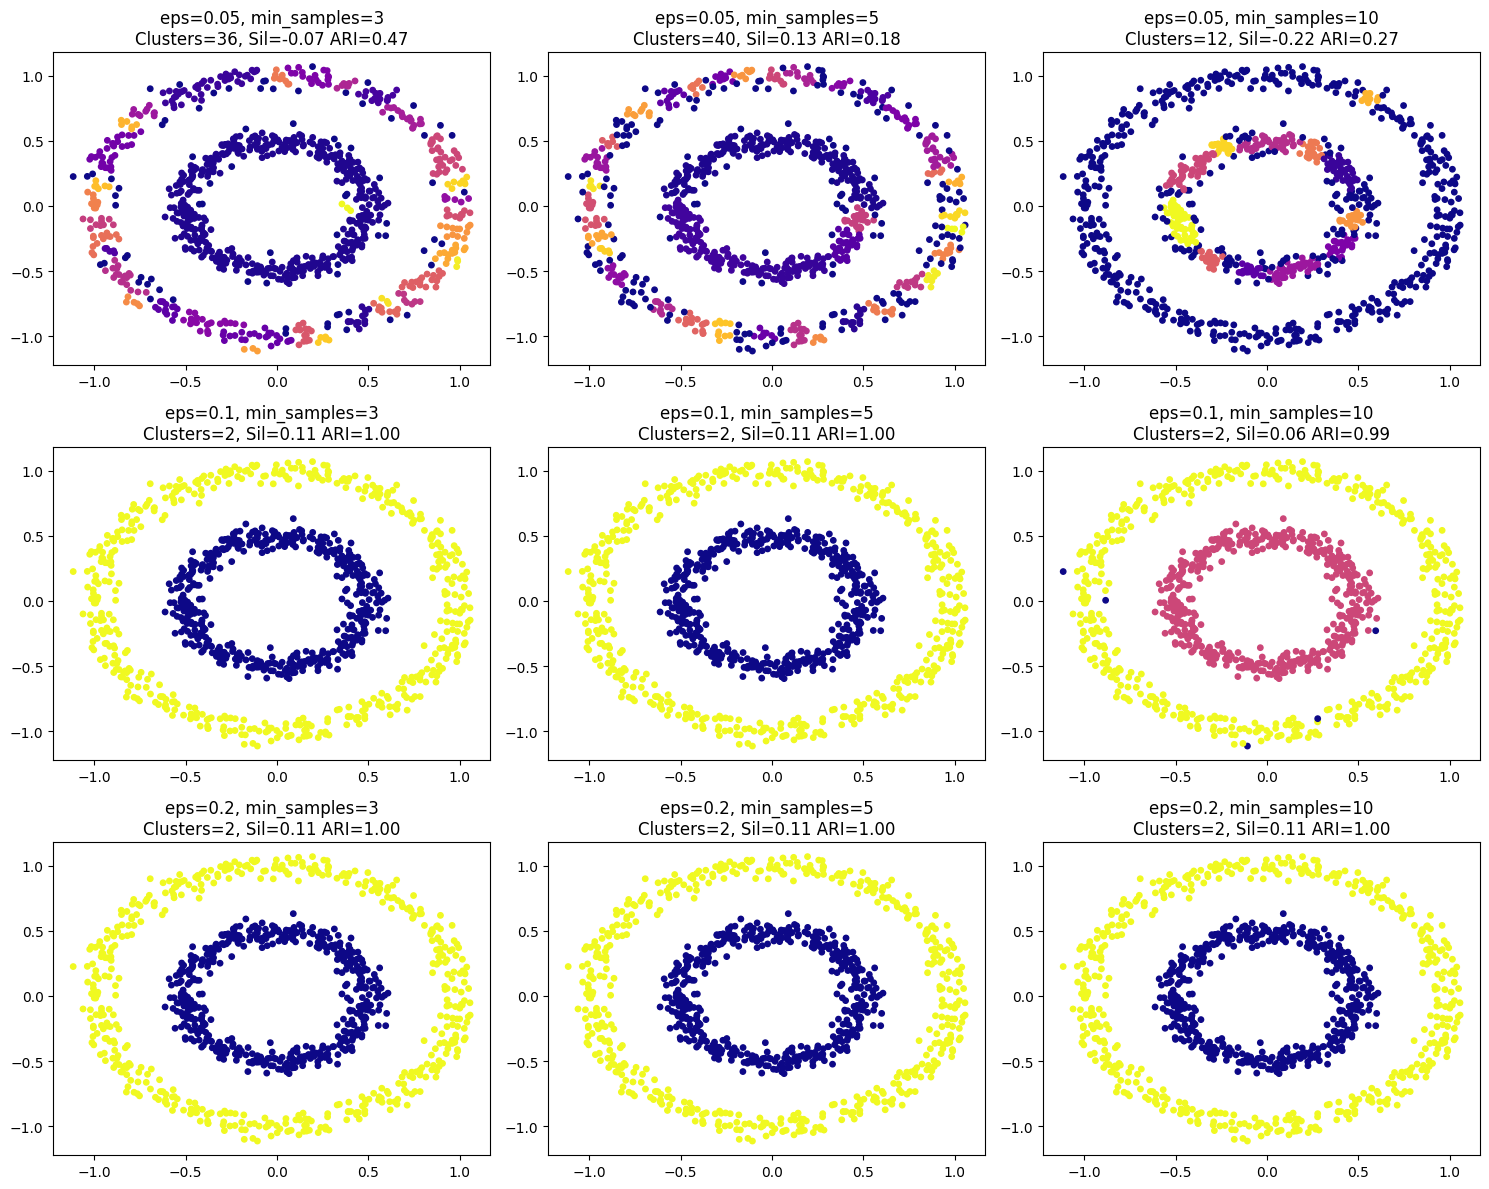

In [ ]:
#Questão 3
# Conjuntos de parâmetros para testar
eps_values = [0.05, 0.1, 0.2]
min_samples_values = [3, 5, 10]

fig, axes = plt.subplots(len(eps_values), len(min_samples_values), figsize=(15, 12))

for i, eps in enumerate(eps_values):
    for j, min_samples in enumerate(min_samples_values):
        # Treinando DBSCAN
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X)

        # Número de clusters encontrados (sem contar ruído)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

        # Métricas
        if n_clusters > 1:
            sil = silhouette_score(X, labels)
            ari = adjusted_rand_score(y, labels)
        else:
            sil, ari = None, None

        # saída
        ax = axes[i, j]
        ax.scatter(X[:, 0], X[:, 1], c=labels, cmap="plasma", s=15)
        ax.set_title(f"eps={eps}, min_samples={min_samples}\nClusters={n_clusters}, Sil={sil:.2f} ARI={ari:.2f}" if sil else f"eps={eps}, min_samples={min_samples}\nClusters={n_clusters}")

plt.tight_layout()
plt.show()

    eps  min_samples  clusters  silhouette       ARI
0  0.05            3        36   -0.067622  0.469765
1  0.05            5        40    0.132218  0.181533
2  0.05           10        12   -0.215450  0.271497
3  0.10            3         2    0.112462  1.000000
4  0.10            5         2    0.112462  1.000000
5  0.10           10         2    0.062897  0.990042
6  0.20            3         2    0.112462  1.000000
7  0.20            5         2    0.112462  1.000000
8  0.20           10         2    0.112462  1.000000


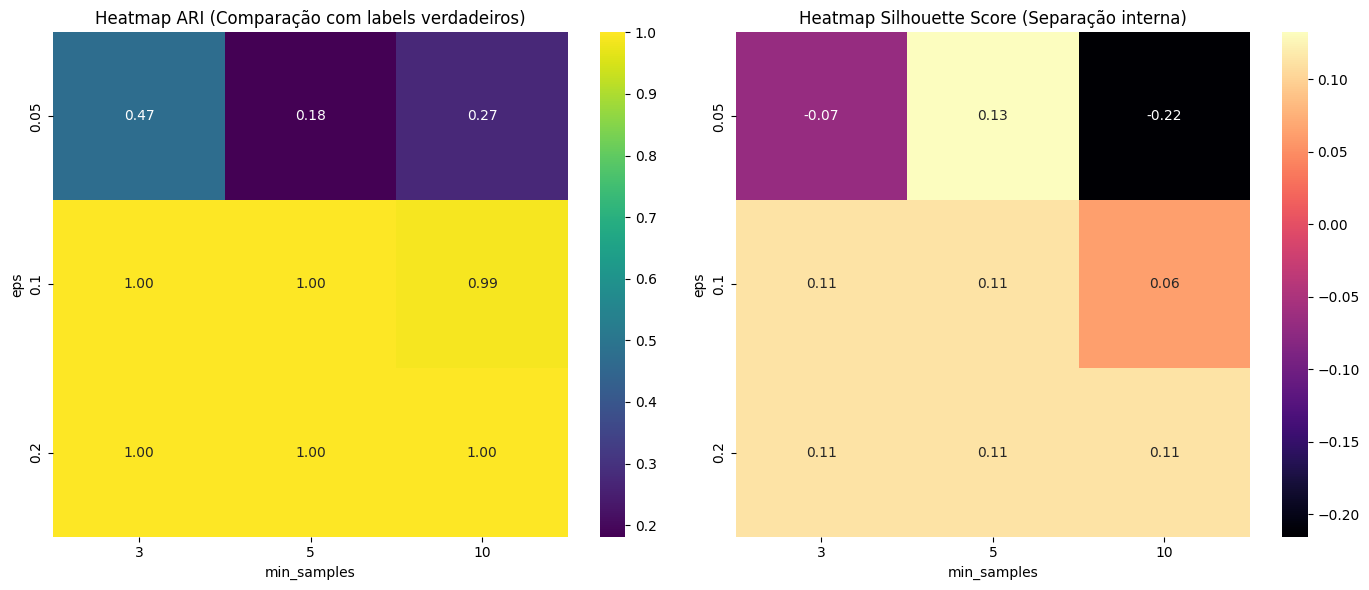

In [ ]:
#Questão 4

results = []

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X)

        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

        # Calcula métricas se houver mais de 1 cluster válido
        if n_clusters > 1:
            sil = silhouette_score(X, labels)
            ari = adjusted_rand_score(y, labels)
        else:
            sil, ari = None, None

        results.append({
            "eps": eps,
            "min_samples": min_samples,
            "clusters": n_clusters,
            "silhouette": sil,
            "ARI": ari
        })

# Converter em DataFrame
df_results = pd.DataFrame(results)

print(df_results)

# Criar pivot table para heatmap (usando ARI como exemplo)
pivot_ari = df_results.pivot_table(index="eps", columns="min_samples", values="ARI")
pivot_sil = df_results.pivot_table(index="eps", columns="min_samples", values="silhouette")

#heatmaps
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.heatmap(pivot_ari, annot=True, cmap="viridis", fmt=".2f")
plt.title("Heatmap ARI (Comparação com labels verdadeiros)")

plt.subplot(1,2,2)
sns.heatmap(pivot_sil, annot=True, cmap="magma", fmt=".2f")
plt.title("Heatmap Silhouette Score (Separação interna)")

plt.tight_layout()
plt.show()

Número de clusters encontrados: 1
Silhouette Score: None
Adjusted Rand Index (ARI): None


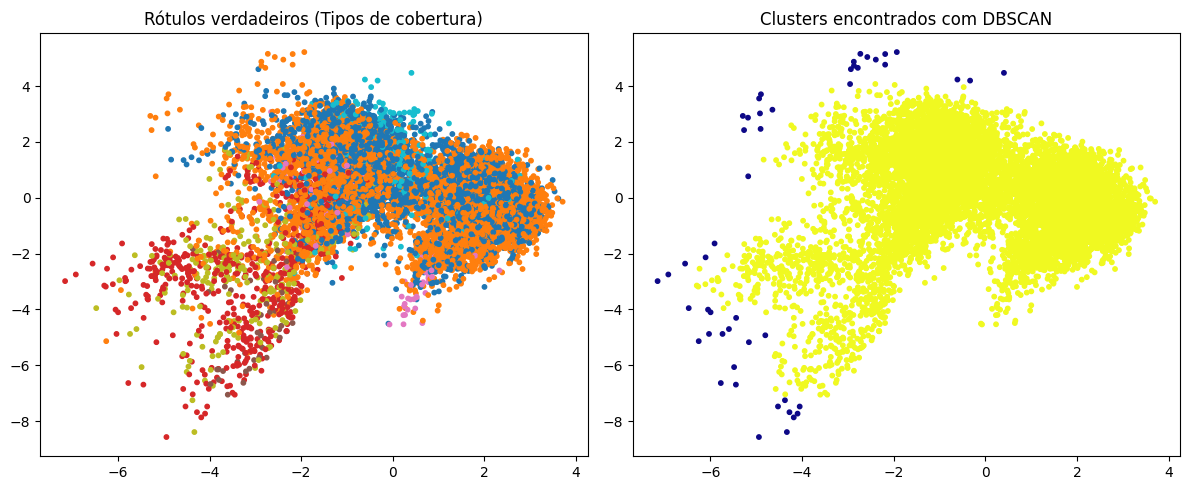

In [ ]:
#Questão 5

# 1. Carregar dataset
data = fetch_covtype()
X_ = data.data
y_ = data.target

# 2. Amostragem
np.random.seed(42)
idx = np.random.choice(len(X_), 10000, replace=False)  # pega 10k amostras
X_sample = X_[idx]
y_sample = y_[idx]

# 3. Normalização
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_sample)

# 4. Redução de dimensionalidade
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 5. Aplicar DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=10)
labels = dbscan.fit_predict(X_pca)

# 6. Número de clusters encontrados
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print(f"Número de clusters encontrados: {n_clusters}")

# 7. Métricas
if n_clusters > 1:
    sil = silhouette_score(X_pca, labels)
    ari = adjusted_rand_score(y_sample, labels)
else:
    sil, ari = None, None

print(f"Silhouette Score: {sil}")
print(f"Adjusted Rand Index (ARI): {ari}")

# 8. Visualização
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(X_pca[:,0], X_pca[:,1], c=y_sample, cmap="tab10", s=10)
plt.title("Rótulos verdadeiros (Tipos de cobertura)")

plt.subplot(1,2,2)
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap="plasma", s=10)
plt.title("Clusters encontrados com DBSCAN")

plt.tight_layout()
plt.show()

Questão 6. Analise os resultados obtidos na questão 5. Existe, aparentemente, alguma espécie dominante? Explique.

O DBSCAN identificou um único agrupamento principal, o que sugere a existência de uma espécie dominante aparente. No entanto, essa dominância não reflete necessariamente uma classe biológica verdadeira, mas sim a dificuldade do algoritmo em separar adequadamente os diferentes tipos de cobertura florestal devido à alta sobreposição entre as classes e à escolha de parâmetros (eps e min_samples) que favoreceram a formação de um único cluster.

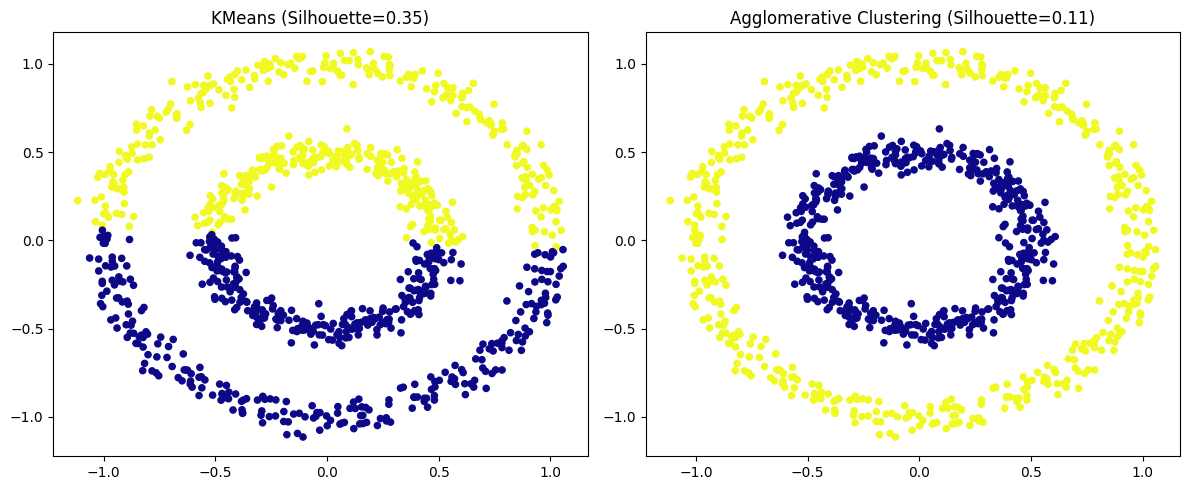

In [ ]:
#Questão 7
# 2. KMeans
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
labels_kmeans = kmeans.fit_predict(X)
sil_kmeans = silhouette_score(X, labels_kmeans)

# 3. Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=2, linkage="single")
labels_agglo = agglo.fit_predict(X)
sil_agglo = silhouette_score(X, labels_agglo)

# 4. Visualização
plt.figure(figsize=(12,5))

# KMeans
plt.subplot(1,2,1)
plt.scatter(X[:,0], X[:,1], c=labels_kmeans, cmap="plasma", s=20)
plt.title(f"KMeans (Silhouette={sil_kmeans:.2f})")

# Agglomerative
plt.subplot(1,2,2)
plt.scatter(X[:,0], X[:,1], c=labels_agglo, cmap="plasma", s=20)
plt.title(f"Agglomerative Clustering (Silhouette={sil_agglo:.2f})")

plt.tight_layout()
plt.show()

In [ ]:
#Questão 8
# --- Algoritmo da Questão 1: DBSCAN ---
dbscan = DBSCAN(eps=0.1, min_samples=5)
labels_dbscan = dbscan.fit_predict(X)

# --- Algoritmos da Questão 7: KMeans e Agglomerative ---
# KMeans
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
labels_kmeans = kmeans.fit_predict(X)

# Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=2, linkage="single")
labels_agglo = agglo.fit_predict(X)

# 2. Calculando as métricas para cada algoritmo
# Comparando os rótulos preditos com os rótulos verdadeiros (y)

# DBSCAN
ari_dbscan = adjusted_rand_score(y, labels_dbscan)
nmi_dbscan = normalized_mutual_info_score(y, labels_dbscan)

# KMeans
ari_kmeans = adjusted_rand_score(y, labels_kmeans)
nmi_kmeans = normalized_mutual_info_score(y, labels_kmeans)

# Agglomerative Clustering
ari_agglo = adjusted_rand_score(y, labels_agglo)
nmi_agglo = normalized_mutual_info_score(y, labels_agglo)

# 3. Apresentando os resultados
print("Resultados da Comparação de Métricas:\n")
print(f"DBSCAN:")
print(f"  - Adjusted Rand Index (ARI): {ari_dbscan:.4f}")
print(f"  - Normalized Mutual Information (NMI): {nmi_dbscan:.4f}\n")

print(f"KMeans:")
print(f"  - Adjusted Rand Index (ARI): {ari_kmeans:.4f}")
print(f"  - Normalized Mutual Information (NMI): {nmi_kmeans:.4f}\n")

print(f"Agglomerative Clustering (linkage='single'):")
print(f"  - Adjusted Rand Index (ARI): {ari_agglo:.4f}")
print(f"  - Normalized Mutual Information (NMI): {nmi_agglo:.4f}\n")


Resultados da Comparação de Métricas:

DBSCAN:
  - Adjusted Rand Index (ARI): 1.0000
  - Normalized Mutual Information (NMI): 1.0000

KMeans:
  - Adjusted Rand Index (ARI): -0.0010
  - Normalized Mutual Information (NMI): 0.0000

Agglomerative Clustering (linkage='single'):
  - Adjusted Rand Index (ARI): 1.0000
  - Normalized Mutual Information (NMI): 1.0000



In [ ]:
#Questão 9
# 2. Calculando o Coeficiente de Silhueta

core_samples_mask = labels_dbscan != -1
X_core = X[core_samples_mask]
labels_dbscan_core = labels_dbscan[core_samples_mask]

# Verificando se o DBSCAN encontrou mais de 1 cluster
if len(np.unique(labels_dbscan_core)) > 1:
    score_dbscan = silhouette_score(X_core, labels_dbscan_core)
else:
    score_dbscan = -1 # não foi possível calcular

score_kmeans = silhouette_score(X, labels_kmeans)
score_agglo = silhouette_score(X, labels_agglo)

print("Resultados da Avaliação com Coeficiente de Silhueta:\n")
print(f"DBSCAN: {score_dbscan:.4f}")
print(f"KMeans: {score_kmeans:.4f}")
print(f"Agglomerative Clustering (linkage='single'): {score_agglo:.4f}")

Resultados da Avaliação com Coeficiente de Silhueta:

DBSCAN: 0.1125
KMeans: 0.3541
Agglomerative Clustering (linkage='single'): 0.1125


Questão 10. Baseando-se em suas avaliações feitas nas questões 8 e 9, explique o significado dos resultados obtidos.

O KMeans ganhou na métrica de Silhueta porque ele é otimizado para criar o tipo de cluster que a métrica de Silhueta valoriza: clusters convexos e esféricos. O algoritmo e a métrica compartilham a mesma "visão de mundo".

O DBSCAN e o Agglomerative ganharam nas métricas ARI/NMI porque eles são flexíveis o suficiente para encontrar a verdadeira estrutura dos dados, que é o que essas métricas foram projetadas para validar.

In [ ]:
#Questão 11
# 1. Carregar o dataset
data = fetch_olivetti_faces()
X = data.data
y = data.target
n_samples, n_features = X.shape
n_classes = len(np.unique(y))

print(f"Dataset carregado: {n_samples} amostras, {n_features} features, {n_classes} classes (pessoas).")

# 2. Redução de Dimensionalidade com PCA
print("Aplicando PCA para redução de dimensionalidade...")
pca = PCA(n_components=150, whiten=True, random_state=42)
X_pca = pca.fit_transform(X)
print(f"Dimensionalidade reduzida para {X_pca.shape[1]} componentes.")

# --- 3. Aplicação dos Algoritmos ---

# a) K-Means
#  40 pessoas -n_clusters=40
print("\nExecutando K-Means...")
kmeans = KMeans(n_clusters=n_classes, random_state=42, n_init=10)
labels_kmeans = kmeans.fit_predict(X_pca)

# b) Agglomerative Clustering
print("Executando Agglomerative Clustering...")
agglo = AgglomerativeClustering(n_clusters=n_classes, linkage='ward')
labels_agglo = agglo.fit_predict(X_pca)

# c) DBSCAN
print("Executando DBSCAN...")
dbscan = DBSCAN(eps=4.5, min_samples=5)
labels_dbscan = dbscan.fit_predict(X_pca)

# --- 4. Avaliação e Apresentação dos Resultados ---

# Métricas para K-Means
ari_kmeans = adjusted_rand_score(y, labels_kmeans)
nmi_kmeans = normalized_mutual_info_score(y, labels_kmeans)
sil_kmeans = silhouette_score(X_pca, labels_kmeans)

# Métricas para Agglomerative Clustering
ari_agglo = adjusted_rand_score(y, labels_agglo)
nmi_agglo = normalized_mutual_info_score(y, labels_agglo)
sil_agglo = silhouette_score(X_pca, labels_agglo)

# Métricas para DBSCAN
if len(np.unique(labels_dbscan)) > 1:
    ari_dbscan = adjusted_rand_score(y, labels_dbscan)
    nmi_dbscan = normalized_mutual_info_score(y, labels_dbscan)
    sil_dbscan = silhouette_score(X_pca, labels_dbscan)
else:
    ari_dbscan, nmi_dbscan, sil_dbscan = 0, 0, 0 # Não foi possível agrupar

n_clusters_dbscan = len(set(labels_dbscan)) - (1 if -1 in labels_dbscan else 0)
n_noise_dbscan = np.sum(np.array(labels_dbscan) == -1)

# Apresentação
print("\n--- Resultados da Clusterização no Olivetti Faces ---")
print(f"\nK-Means:")
print(f"  - ARI: {ari_kmeans:.4f}")
print(f"  - NMI: {nmi_kmeans:.4f}")
print(f"  - Silhouette: {sil_kmeans:.4f}")

print(f"\nAgglomerative Clustering (ward):")
print(f"  - ARI: {ari_agglo:.4f}")
print(f"  - NMI: {nmi_agglo:.4f}")
print(f"  - Silhouette: {sil_agglo:.4f}")

print(f"\nDBSCAN:")
print(f"  - Clusters encontrados: {n_clusters_dbscan}")
print(f"  - Pontos de ruído: {n_noise_dbscan}")
print(f"  - ARI: {ari_dbscan:.4f}")
print(f"  - NMI: {nmi_dbscan:.4f}")
print(f"  - Silhouette: {sil_dbscan:.4f}")

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data
Dataset carregado: 400 amostras, 4096 features, 40 classes (pessoas).
Aplicando PCA para redução de dimensionalidade...
Dimensionalidade reduzida para 150 componentes.

Executando K-Means...
Executando Agglomerative Clustering...
Executando DBSCAN...

--- Resultados da Clusterização no Olivetti Faces ---

K-Means:
  - ARI: 0.0381
  - NMI: 0.4739
  - Silhouette: -0.0001

Agglomerative Clustering (ward):
  - ARI: 0.3143
  - NMI: 0.7722
  - Silhouette: 0.0030

DBSCAN:
  - Clusters encontrados: 0
  - Pontos de ruído: 400
  - ARI: 0.0000
  - NMI: 0.0000
  - Silhouette: 0.0000


Questão 12

A comparação dos resultados mostra de forma inequívoca que o Agglomerative Clustering foi o algoritmo mais adequado para esta tarefa, superando amplamente o K-Means e o DBSCAN.

A análise destaca que, para dados complexos e de alta dimensão como imagens de faces, algoritmos com suposições mais flexíveis sobre a forma dos clusters (Agglomerative) tendem a performar melhor que aqueles com suposições rígidas (K-Means).

Também fica evidente que algoritmos baseados em densidade como o DBSCAN não são a ferramenta correta quando os clusters não são separados por áreas de baixa densidade bem definidas.